# Macroevolutionary birth-death process with traits evolving

Thu Si Nguyen Mai - s278836

Consider a macroevolutionary birth-death process with traits evolving as in the model you studied in the exercises. While in the exercises we assumed that species with different traits had different speciation rates, here we do something different. We assume that we have some form of diversity-dependent speciation, but not quite like in the exercises, but our diversity-dependence is now weighted by the traits. Specifically, we assume that the overall per capita speciation rate is **$\lambda = \lambda_0(1 – a_0 N_0 – a_1 N_1)$** where $N_0$ and $N_1$ are the numbers of species with traits 0 and 1 respectively, and $a_0$ and $a_1$ are parameters, but with the additional note that the rate is not allowed to become negative (obviously!). During speciation the trait is conserved; both daughter species have the state of the parent species. The per capita extinction rate is constant and independent of the trait values. Traits can change from 0 to 1 and from 1 to 0, with rates $q_{01}$ and $q_{10}$; this is trait evolution. The initial state of the system is one species with trait 0 and one species with trait 1.

#### 1. What is the interpretation of $a_0$ and $a_1$? What does it mean if they are large or small, and if they differ a lot or are equal?

The parameters indicate that the per capita speciation rate $\lambda$ is inversely proportional to the diversity ($N$). The larger the number of species $N$, the lower the per capita speciation rate $\lambda$. If $a_0 = a_1$, then $\lambda = \lambda_0(1-a_0 N) = \lambda_0(1-a_1 N)$, thus, $\lambda$ is a decreasing function as $N$ increases and $\lambda_0$ is the maximum per capita speciation rate. Biologically, this represents that there is a carrying capacity of the environment that restricting the number of species exists at a time. The more species are existing, the less resources there are for new species to arise. When $a_0 = a_1$, the model of $\lambda$ is equivalent to that of the diversity-dependent model without traits evolution $\lambda = \lambda_0*(1 - N/K)$ with $a_0 = a_1 = 1/K$.

$a_0$ and $a_1$ represent the effects of the diversity of species with trait 0 ($N_0$) and the diversity of species with trait 1 ($N_1$), respectively, on $\lambda$. If $a_0 >> a_1$, then the increase in diversity of trait 0 ($N_0$) has stronger effect on the decrease in the overall per capita speciation rate, which biologically, represents that species with trait 0 are stronger competitors for resources such that the more number of them, the more difficult for a new species to arise; and vice versa.

In other words, $a_0 = 1/K_0$ and $a_1 = 1/K_1$ where $K_0$ and $K_1$ are carrying capacity for trait 0 and for trait 1, respectively. As $a$ becomes larger, the corresponding trait appears to consume more resources and thus, the maximum number of species with that trait that the environment could sustain becomes smaller.

#### 2a. A plot of the phylogeny with extinct species in it

In [ ]:
library(DDD)
library(ape)
library(ggplot2)
library(ggtree)
library(gridExtra)
library(repr)

fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

source("SiNguyenMai_s4278836.R")

I chose $\lambda_0 = 3$, $a_0 = 0.007$, $a_1 = 0.0001$, $mu = 0.1$, $q_{01}=0.1$, and $q_{10}=0.8$.

In [2]:
set.seed(17)
params <- c(3, 0.007, 0.0001, 0.1, 0.1, 0.8)
sim_data <- model_sim(pars = params, age = 50)

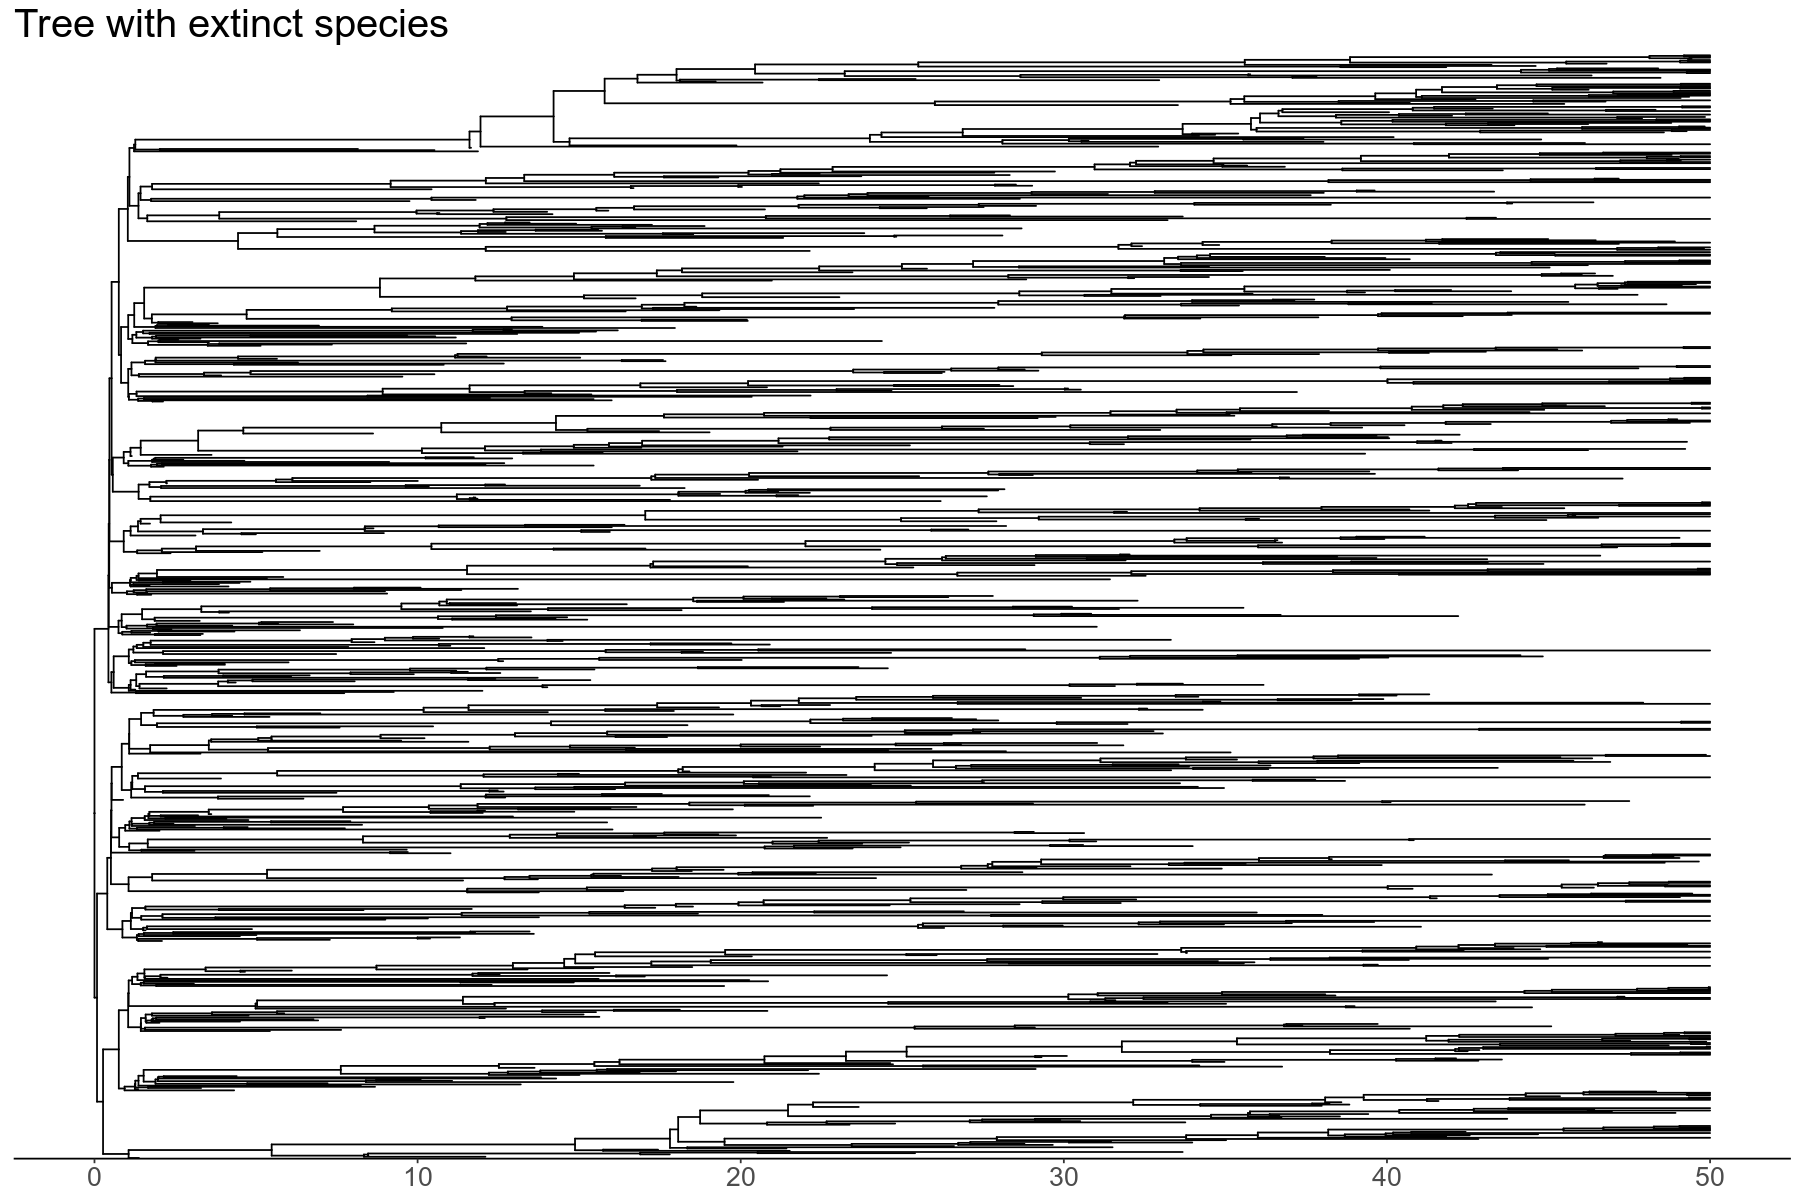

In [3]:
plot_tree <- ggtree(sim_data[['tas']]) + 
            ggtitle("Tree with extinct species") + 
#             geom_treescale(x=0, y=1110, width=10, fontsize=7, linesize = 2, offset=7, color='DarkBlue') +
            theme_tree2(text = element_text(size = 20))
fig(15, 10)
plot_tree

#### 2b. A plot of the phylogeny without extinct species in it

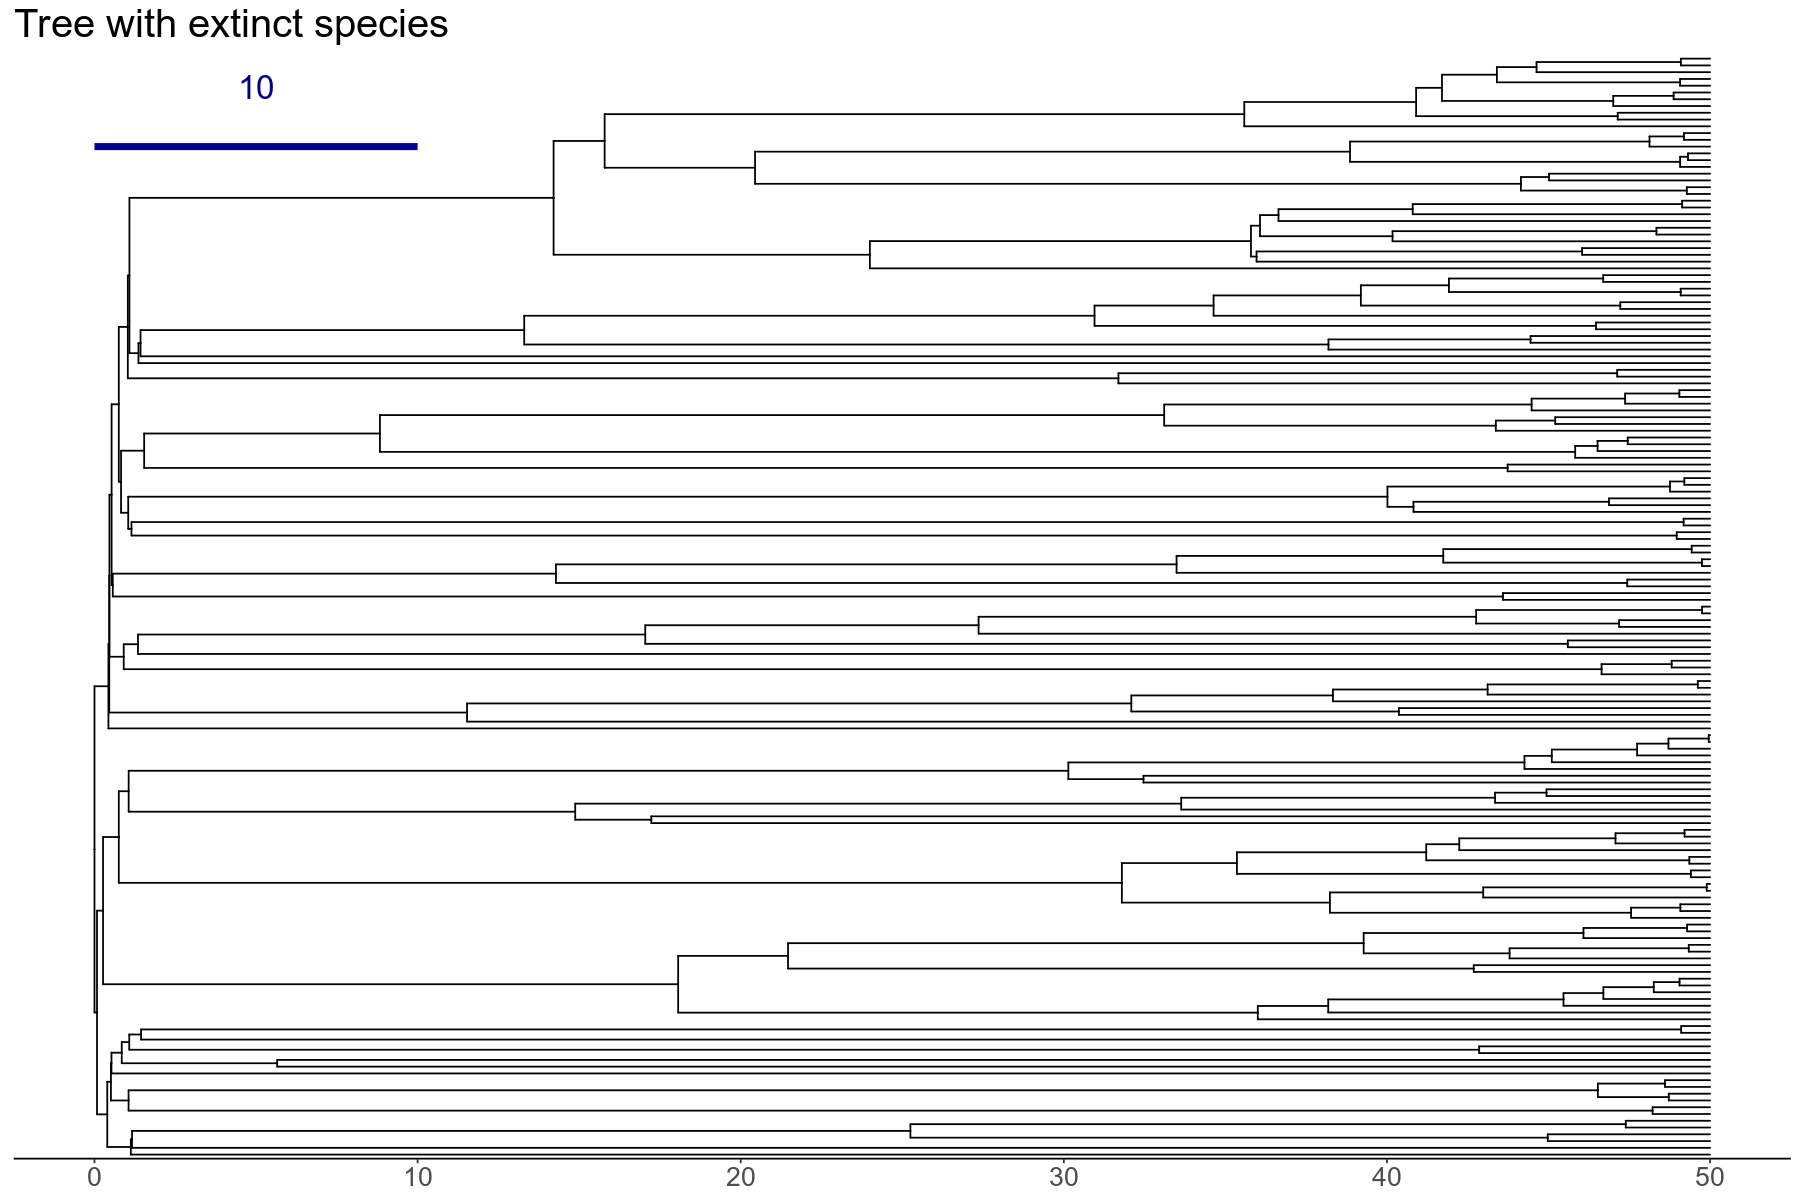

In [4]:
plot_tree <- ggtree(sim_data[['tes']]) + 
            ggtitle("Tree with extinct species") + 
            geom_treescale(x=0, y=150, width=10, fontsize=7, linesize = 2, offset=7, color='DarkBlue') +
            theme_tree2(text = element_text(size = 20))
fig(15, 10)
plot_tree

#### 2c. An ltt.plot of the phylogeny without extinct species

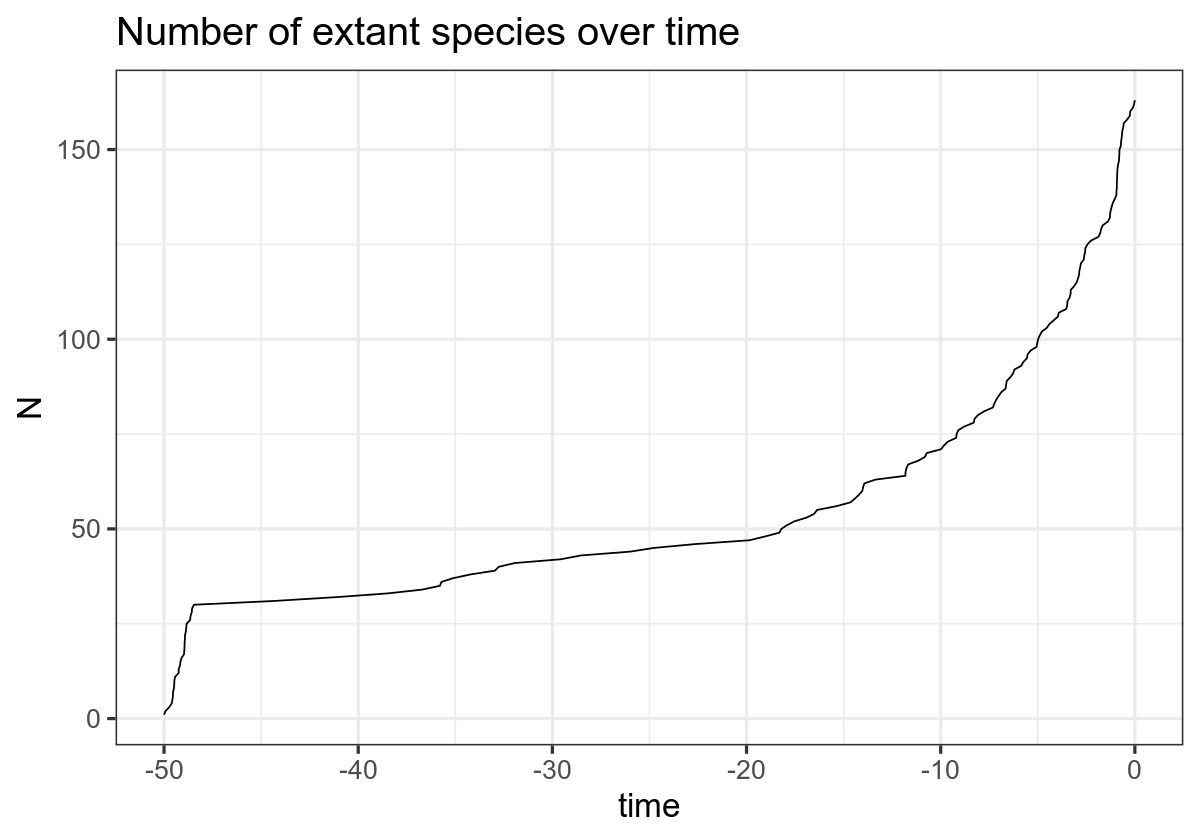

In [5]:
ltt_data <- as.data.frame(ape::ltt.plot.coords(sim_data[["tes"]]))

fig(10,7)
ggplot(ltt_data, aes(x=time, y=N)) + geom_line() +
ggtitle("Number of extant species over time") +
theme_bw(base_size = 20)

#### 2d. A plot of the number of species as a function of time

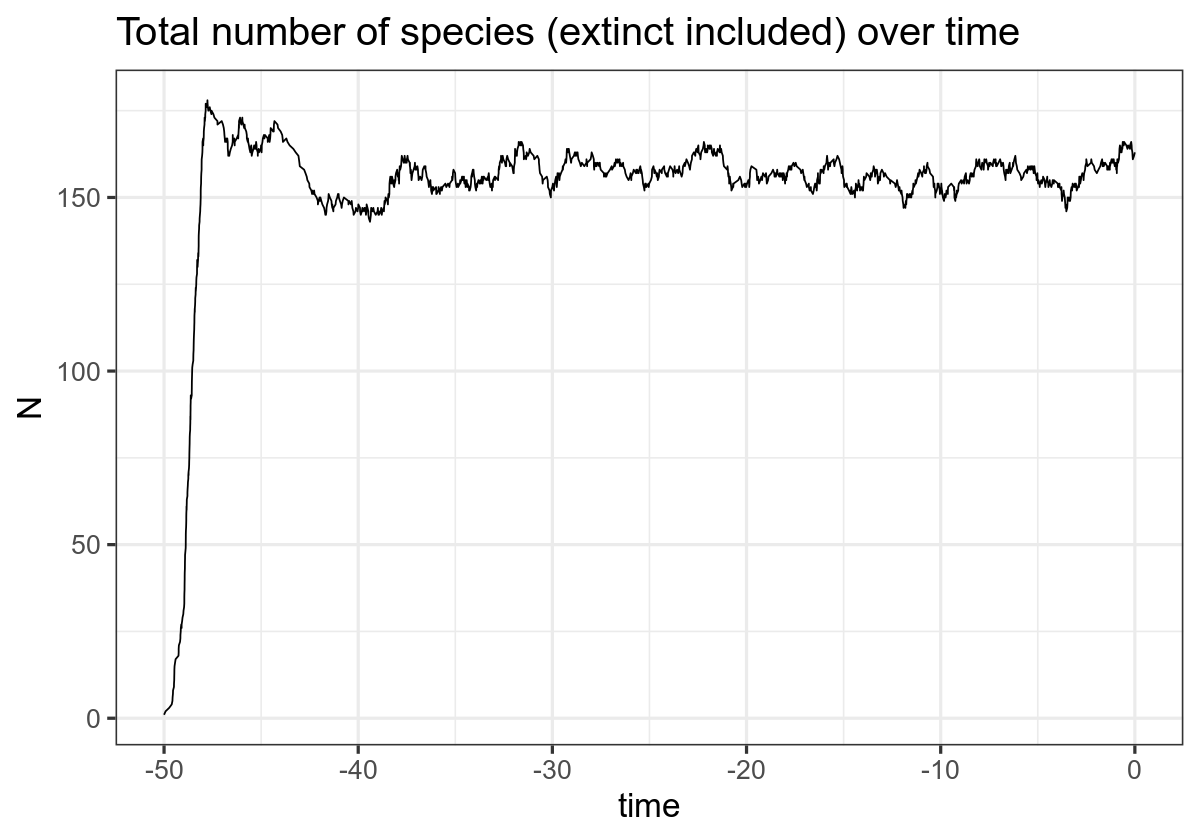

In [6]:
ltt_data <- as.data.frame(ape::ltt.plot.coords(sim_data[["tas"]]))

fig(10,7)
ggplot(ltt_data, aes(x=time, y=N)) + geom_line() +
ggtitle("Total number of species (extinct included) over time") +
theme_bw(base_size = 20)

#### 3. For this model there is no likelihood formula available. However, we can use the standard diversity-dependent model you studied to try to detect whether diversity-dependence is happening, even though the model that is used to generate the data is not the same as the model used to estimate the parameters. Why is it still useful to do this?

It is still useful to use the standard model without trait evolution because the major objective here is to estimate the likelihood of diversity-dependence. As discussed above for the meaning of $a_0$ and $a_1$ parameters, $\lambda$ of the model with trait evolution is also dependent on and inversely proportional to species diversity. One difference between the models is that the model with traits has two subsets of species with two scales in the relationship between $\lambda$ and diversity ($a_0$ and $a_1$). Although those scales could be different from each other, the relationship between $\lambda$ and diversity is still qualitatively as same as in the standard model.

We may only need a maximum likelihood estimation formula tailored to the model with trait evolution only when we want to estimate the effect of each trait ($a_0$ and $a_1$) and/or to detect whether trait-dependence is happening (the likelihood of trait-dependence).

#### 4. Choose $\mu = 0.1$, $\lambda_0 = 0.8$, $q_{01} = q_{10} = 0.1$ and $a_0 = 0.025$ and $a_1 = 0.05$. Simulate 100 trees. Estimate the parameters of the standard diversity-dependent model applied to these 100 data sets.

Here, $a_1 > a_0$, indicating that species with trait 1 have stronger negative effect on the overall per capita speciation rate, and thus are stronger competitors for resources.

In [4]:
params <- c(0.8, 0.025, 0.05, 0.1, 0.1, 0.1)

# simulate 100 trees and collect there branching times for ML analysis
brts_data <- list()

set.seed(17)
for (i in 1:100){   
    sim_data <- model_sim(pars = params, age = 50)
    brts_data[[i]] <- ape::branching.times(sim_data$tes) 
}

In [ ]:
# estimate the parameters with the standard model
opt_data <- data.frame()

for (i in 1:100){
    opt <- DDD::dd_ML(brts_data[[i]])
    opt_data <- rbind(opt_data, opt)
}

In [12]:
head(opt_data)

,lambda,mu,K,loglik,df,conv
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,0.2519969,0.09186265,25.06844,-87.44237,3,0
2,1.8015795,0.10430257,21.66470,-72.18693,3,0
3,1.4728699,0.09522371,19.64232,-66.23677,3,0
4,1.7125364,0.11077191,25.43894,-83.81189,3,0
5,0.9211515,0.10267613,25.35535,-86.82042,3,0
6,1.4554908,0.18136568,24.90927,-76.53441,3,0


In [16]:
summary(opt_data[, 1:4])

     lambda             mu                K             loglik      
 Min.   :0.1098   Min.   :0.01912   Min.   :17.59   Min.   :-98.02  
 1st Qu.:0.6675   1st Qu.:0.08415   1st Qu.:21.53   1st Qu.:-84.34  
 Median :0.9254   Median :0.10244   Median :23.09   Median :-79.07  
 Mean   :1.1904   Mean   :0.10400   Mean   :23.15   Mean   :-78.75  
 3rd Qu.:1.4482   3rd Qu.:0.12263   3rd Qu.:24.79   3rd Qu.:-73.04  
 Max.   :6.3824   Max.   :0.31862   Max.   :28.69   Max.   :-50.95  

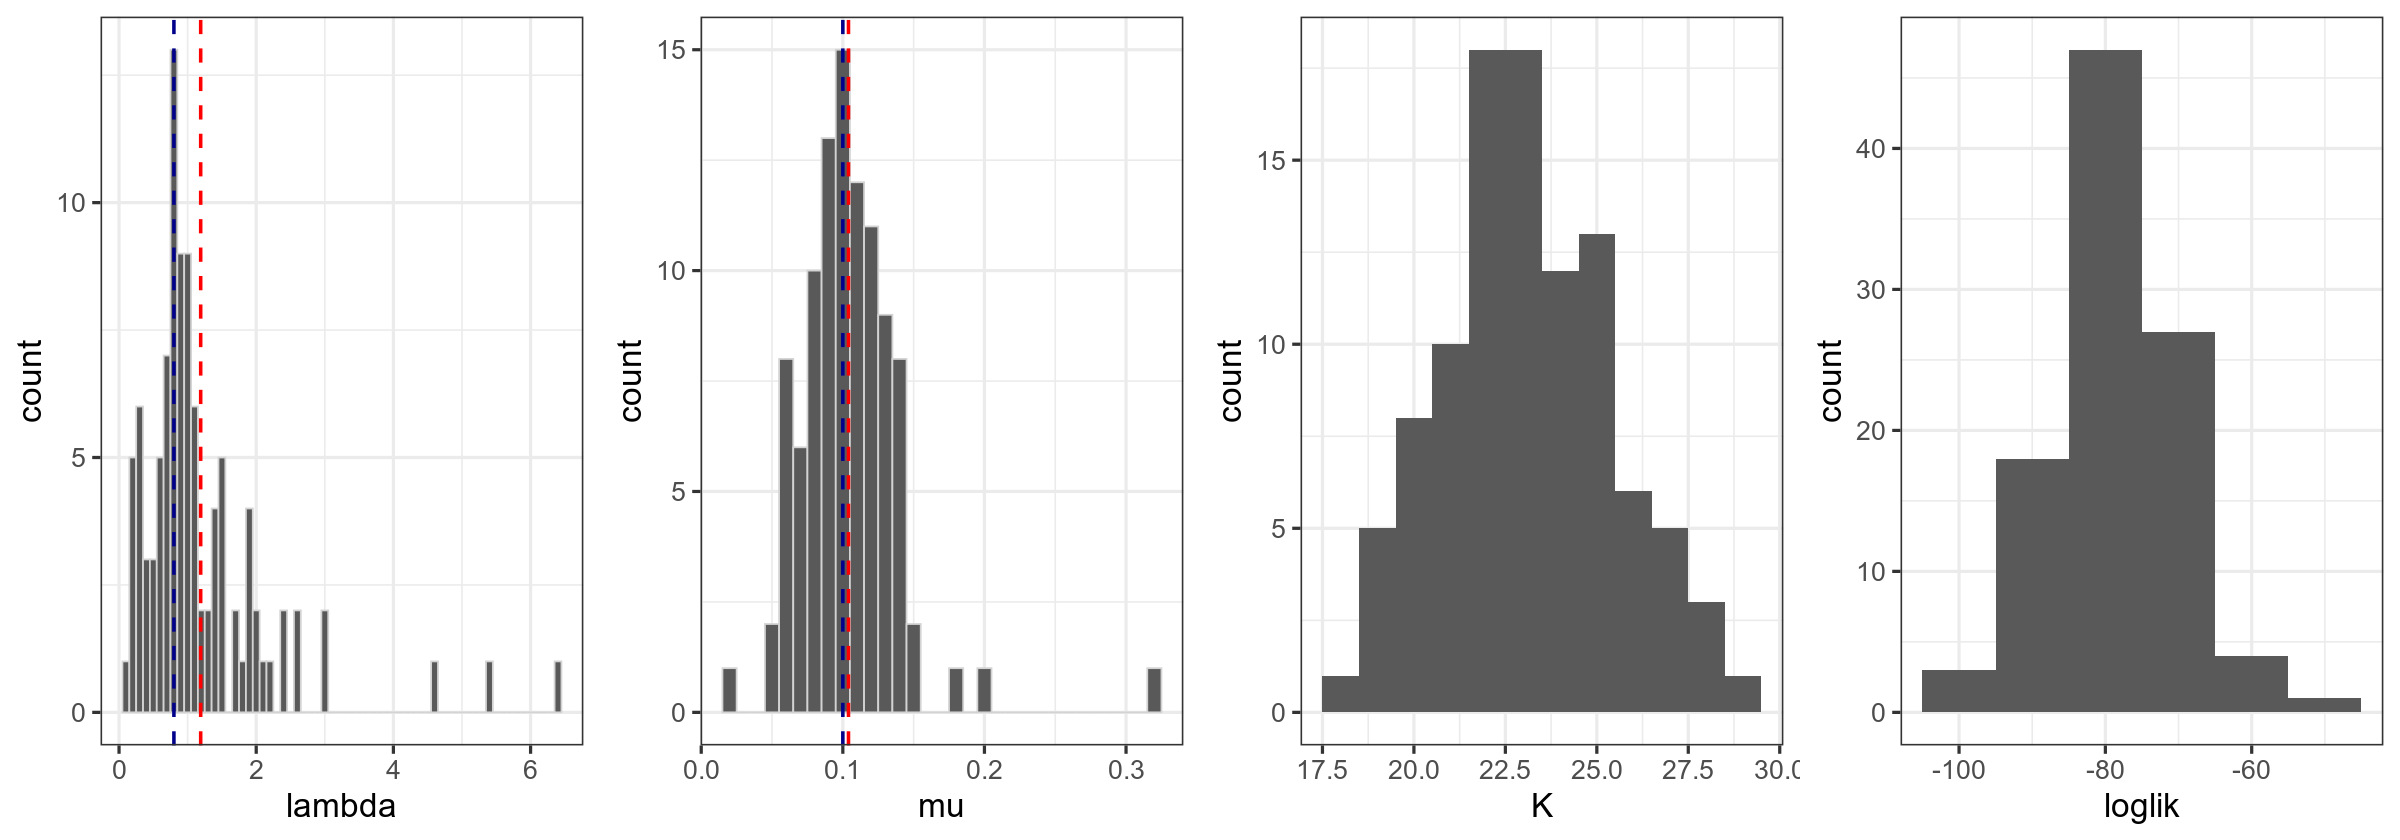

In [24]:
hla <- ggplot(opt_data, aes(x=lambda)) + geom_histogram(binwidth = 0.1, color="LightGray") + 
        geom_vline(aes(xintercept = 0.8), color="DarkBlue", linetype="dashed", size=1)+
        geom_vline(aes(xintercept = mean(lambda)), color="red", linetype="dashed", size=1)+
        theme_bw(base_size = 20)
hmu <- ggplot(opt_data, aes(x=mu)) + geom_histogram(binwidth = 0.01, color="LightGray") + 
        geom_vline(aes(xintercept = 0.1), color="DarkBlue", linetype="dashed", size=1)+
        geom_vline(aes(xintercept = mean(mu)), color="red", linetype="dashed", size=1)+
        theme_bw(base_size = 20)
hk <- ggplot(opt_data, aes(x=K)) + geom_histogram(binwidth = 1) + theme_bw(base_size = 20)
hl <- ggplot(opt_data, aes(x=loglik)) + geom_histogram(binwidth = 10) + theme_bw(base_size = 20)

fig(20, 7)
grid.arrange(hla, hmu, hk, hl, ncol=4, nrow=1)

As can be observed from the above histograms, the $\mu$ value of the model with traits evolution was very close to the estimates by the model without trait evolution. The $\lambda_0$ value also agreed with the estimated values, although in a slightly less extent. This could be due to the quantitative difference between the models in the relationship between $\lambda$ and species diversity. The models are equivalent when $a_0 = a_1$ where $\lambda$ is dependent on only 1 free parameter ($a_0 = a_1 = 1/K$). However, in this case, $a_1 > a_0$ and so, $\lambda$ was dependent on 2 free parameters (although both of them were proportional to the negative effect of diversity on speciation rate).

The estimated $K$ were in range of (17.59, 28.69), indicating that there was a finite carrying capacity that sets a limit to the number of species and thus, the more species there are, the less likely to have new species (i.e. speciation). This is diversity-dependence. Additionally, as I have stated that we could consider $a_0$ and $a_1$ as the inverses of carrying capacity for species with trait 0 and trait 1, respectively, I can derive that here $K_0 = 1/0.025 = 40$ and $K_1 = 1/0.05 = 20$. Interestingly, the estimated $K$ by the model without traits evolution were also somewhere between the range of $(K_1, K_0) = (20, 40)$, suggesting an agreement between the models on how speciation depends on diversity.

Taken together, the estimation strongly suggests that there is density-dependence.

#### 5. How can you determine whether the diversity-dependent model is a better fit than a diversity-independent model?

I think we could do the maximum likelihood estimation on the simulated data with the diversity-independent model (fixed $K=\infty$), and then:
- Examine the distributions of the estimated $\lambda_0$ and $\mu$ to have a first look at how well the estimates from the diversity-independent model match the parameters of the model with diversity-dependence and trait evolution.
- Try comparing the diversity-dependent and diversity-independent models using AIC weights.

In [ ]:
# estimate the parameters with the density-independent model
opt_data_inde <- data.frame()

for (i in 1:100){
    opt <- DDD::dd_ML(brts_data[[i]], initparsopt = c(0.8, 0.1), idparsopt=c(1,2), idparsfix=3, parsfix=Inf)
    opt_data_inde <- rbind(opt_data_inde, opt)
}

In [74]:
summary(opt_data_inde[, c(1, 2, 4)])

     lambda              mu                loglik       
 Min.   :0.03839   Min.   :0.0000163   Min.   :-103.61  
 1st Qu.:0.06719   1st Qu.:0.0384140   1st Qu.: -89.14  
 Median :0.09124   Median :0.0678005   Median : -84.69  
 Mean   :0.09378   Mean   :0.0683835   Mean   : -83.79  
 3rd Qu.:0.11041   3rd Qu.:0.0906959   3rd Qu.: -78.15  
 Max.   :0.29423   Max.   :0.2942077   Max.   : -59.98  

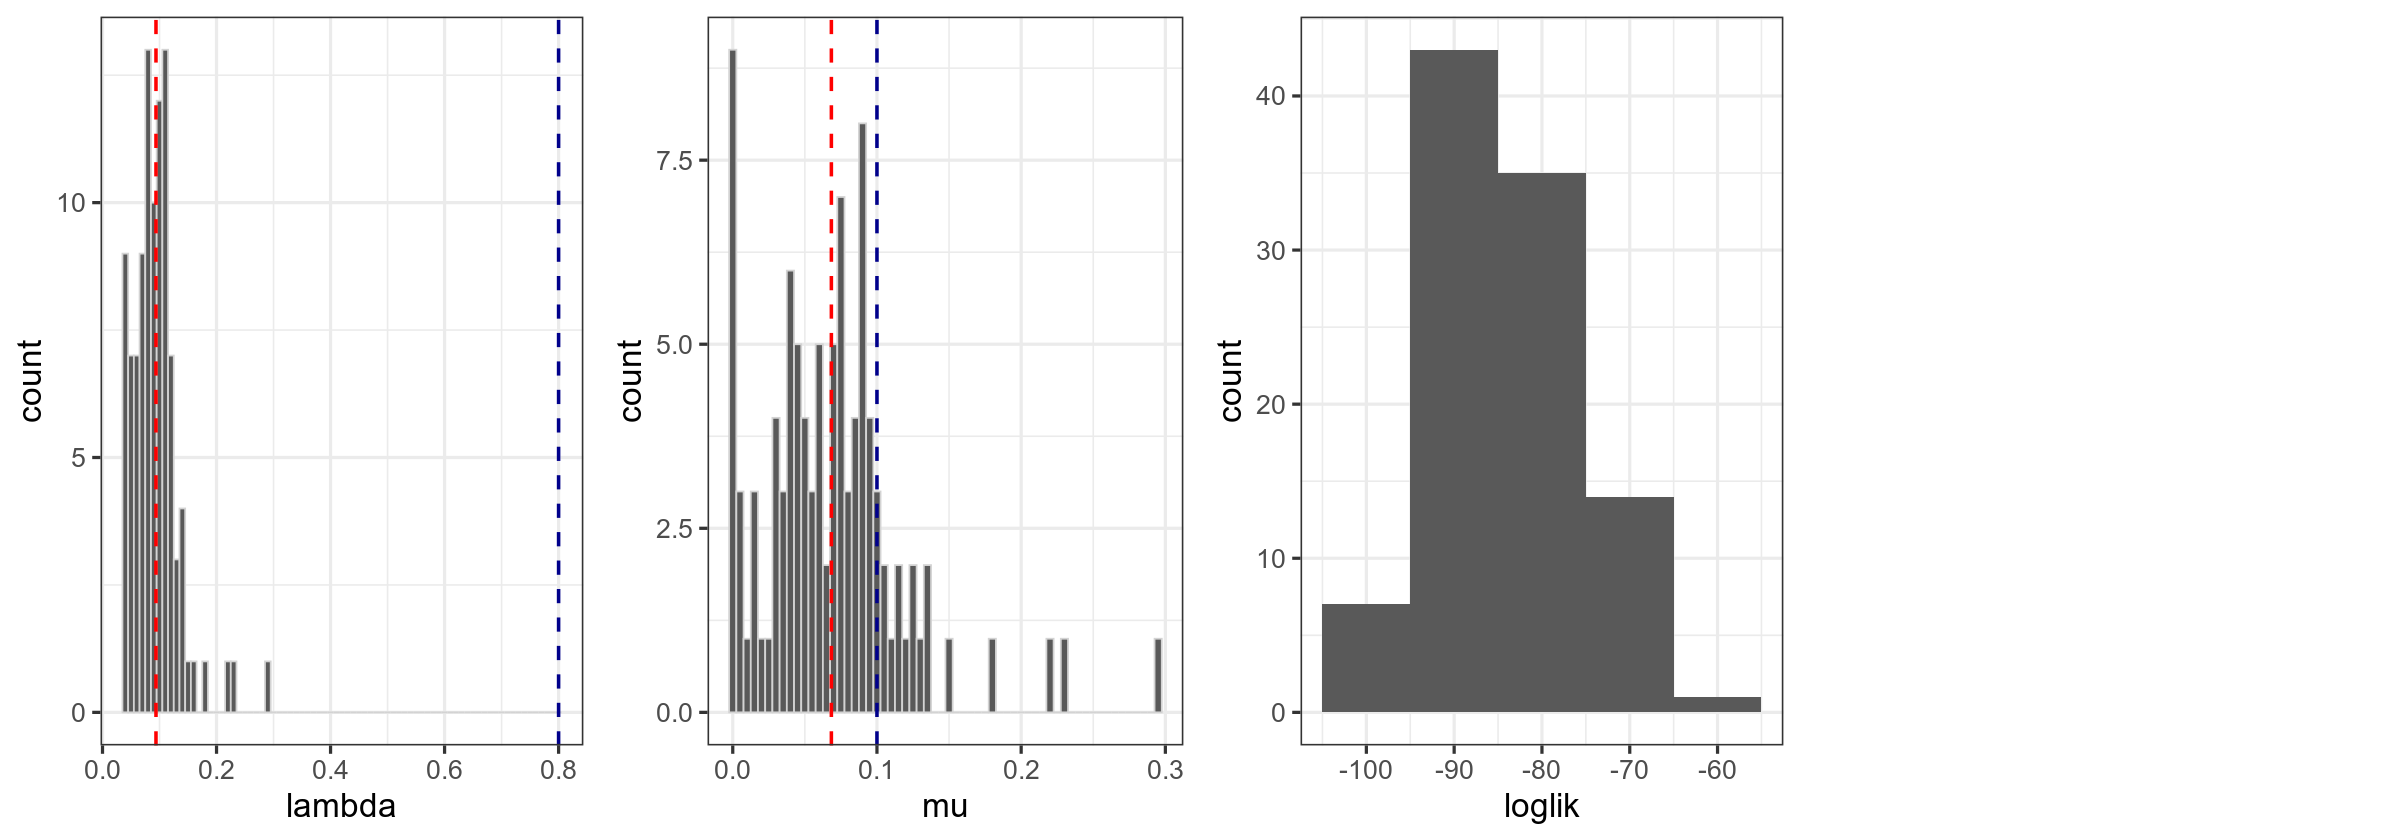

In [38]:
hla <- ggplot(opt_data_inde, aes(x=lambda)) + geom_histogram(binwidth = 0.01, color= "LightGray") + 
        geom_vline(aes(xintercept = 0.8), color="DarkBlue", linetype="dashed", size=1)+
        geom_vline(aes(xintercept = mean(lambda)), color="red", linetype="dashed", size=1)+
        theme_bw(base_size = 20)

hmu <- ggplot(opt_data_inde, aes(x=mu)) + geom_histogram(binwidth = 0.005, color="LightGray") + 
        geom_vline(aes(xintercept = 0.1), color="DarkBlue", linetype="dashed", size=1)+
        geom_vline(aes(xintercept = mean(mu)), color="red", linetype="dashed", size=1)+
        theme_bw(base_size = 20)
# hk <- ggplot(opt_data_inde, aes(x=K)) + geom_histogram(binwidth = 1) + theme_bw(base_size = 20)
hl <- ggplot(opt_data_inde, aes(x=loglik)) + geom_histogram(binwidth = 10) + theme_bw(base_size = 20)

fig(20, 7)
grid.arrange(hla, hmu, hl, ncol=4, nrow=1)

The histograms showed that the estimated $\lambda$ and $\mu$ from the diversity-independent model were considerably far from the parameters used to simulate the data under the diversity-dependent and trait evolving model. This is in contrast with what I observed in the estimates from the diversity-dependent model. These suggests that the diversity-dependent model could be the better fit than the diversity-independent model.

Now, let's look at the AIC weights.

In [57]:
w_df <- data.frame()

for (i in 1:100){
    logL_de <- opt_data[i, 4]
    logL_inde <- opt_data_inde[i, 4]
    
    aic_de <- -2*logL_de + 2*3
    aic_inde <- -2*logL_inde + 2*2
    aic <- c(aic_de, aic_inde)
    
    aic_min <- min(aic)
    aic_diff <- sapply(aic, function(x) exp(-x/2 + aic_min/2))
    aic_diff_sum <- sum(aic_diff)
    weights <- sapply(aic_diff, function(x) x/aic_diff_sum)
                      
    w_df <- rbind(w_df, weights)
}
                      
names(w_df) <- c("diversity-dependent", "diversity-independent")
summary(w_df)

 diversity-dependent diversity-independent
 Min.   :0.5061      Min.   :0.000017     
 1st Qu.:0.9084      1st Qu.:0.003579     
 Median :0.9789      Median :0.021116     
 Mean   :0.9181      Mean   :0.081903     
 3rd Qu.:0.9964      3rd Qu.:0.091551     
 Max.   :1.0000      Max.   :0.493870     

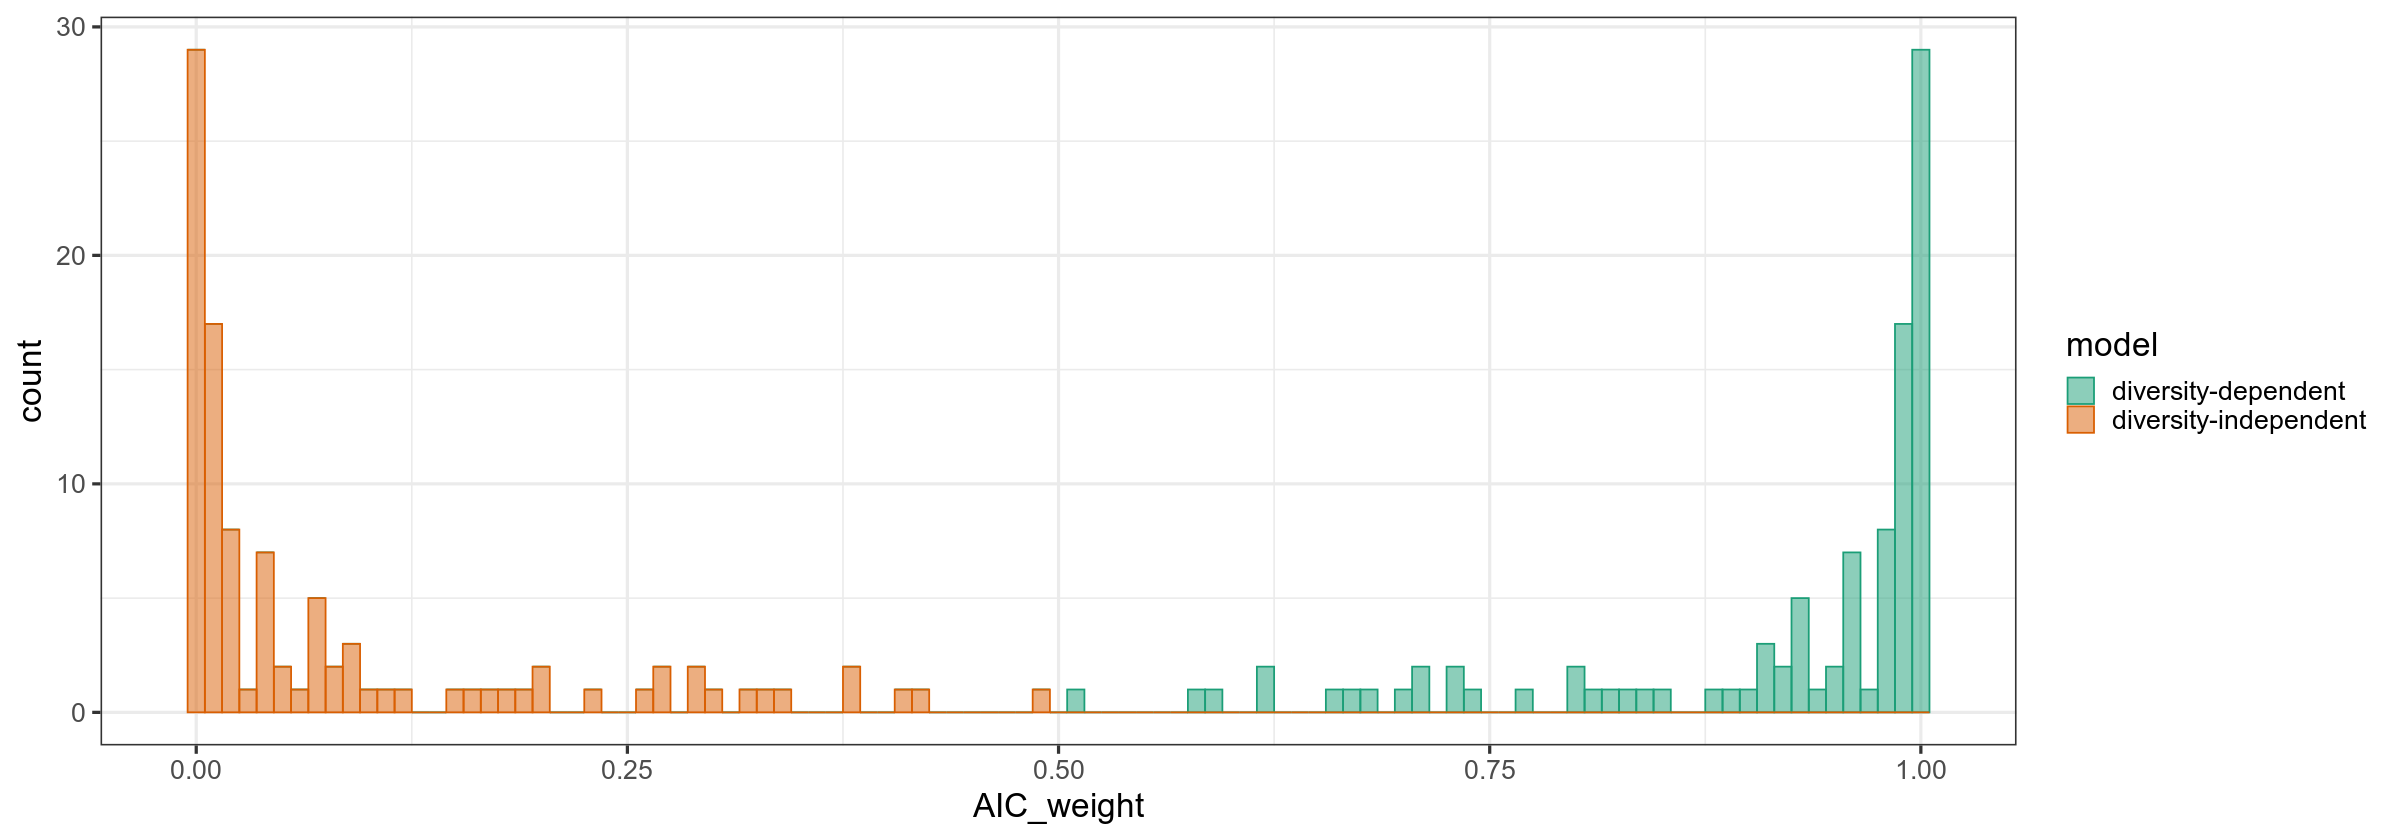

In [67]:
library(tidyr)
w_df_long <- gather(w_df, key = "model", value = "AIC_weight", "diversity-dependent", "diversity-independent")

ggplot(w_df_long, aes(x = AIC_weight, color = model, fill = model)) + 
geom_histogram(binwidth = 0.01, alpha = 0.5) +
scale_color_brewer(palette="Dark2") +
scale_fill_brewer(palette="Dark2") +
theme_bw(base_size = 20)

The distributions of the AIC weights also strongly supported that the diversity-dependent model is the better fit. AIC weights of the diversity-dependent model were very close to 1, while on the contrary, the AIC weights of the diversity-independent model were very close to 0.